**Week Six - Assignment Data Sets**

**Assignment Group 1: Adam Gersowitz, Diego Correa, Maria Ginorio**

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:


Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.




Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

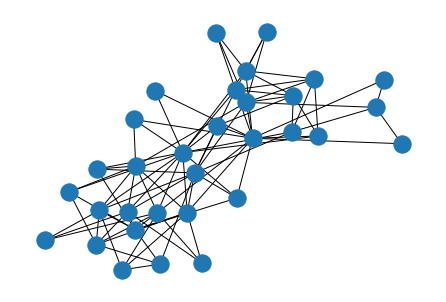

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G,  seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()
    

What can you infer about the relationships between (1) the women, and (2) the social events?  


#Common clubs, Club
8 E1
8 E2
8 E3
8 E4
8 E5
13 E6
13 E7
13 E8
13 E9
8 E10
8 E11
8 E12
8 E13
8 E14

#Club meetings, Clubs
19 E1
20 E2
32 E3
23 E4
38 E5
41 E6
48 E7
59 E8
46 E9
25 E10
13 E11
28 E12
18 E13
18 E14


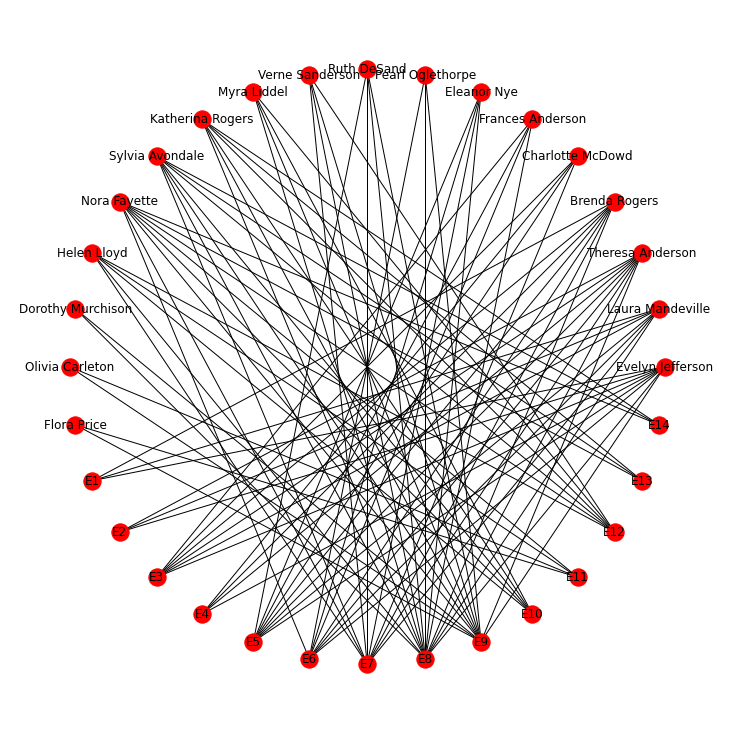

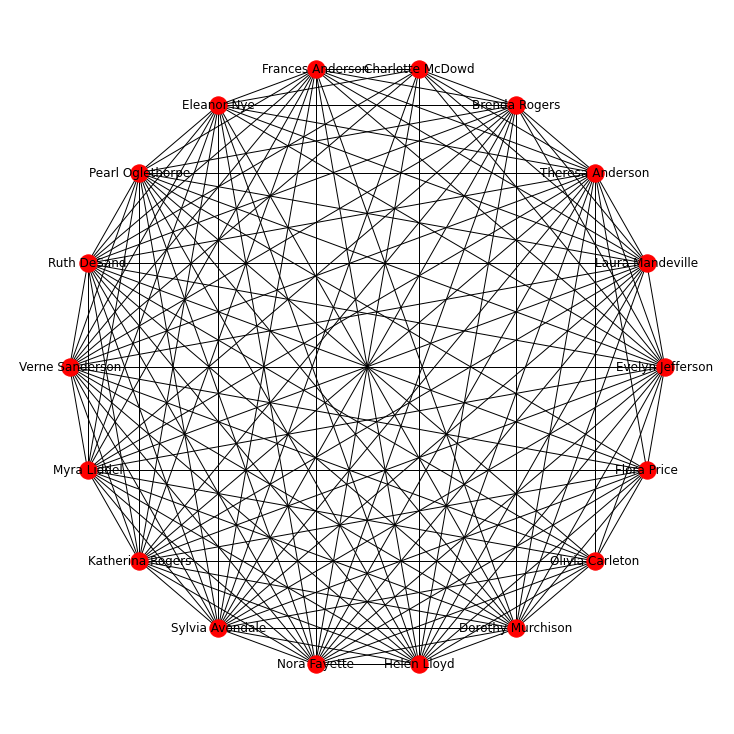

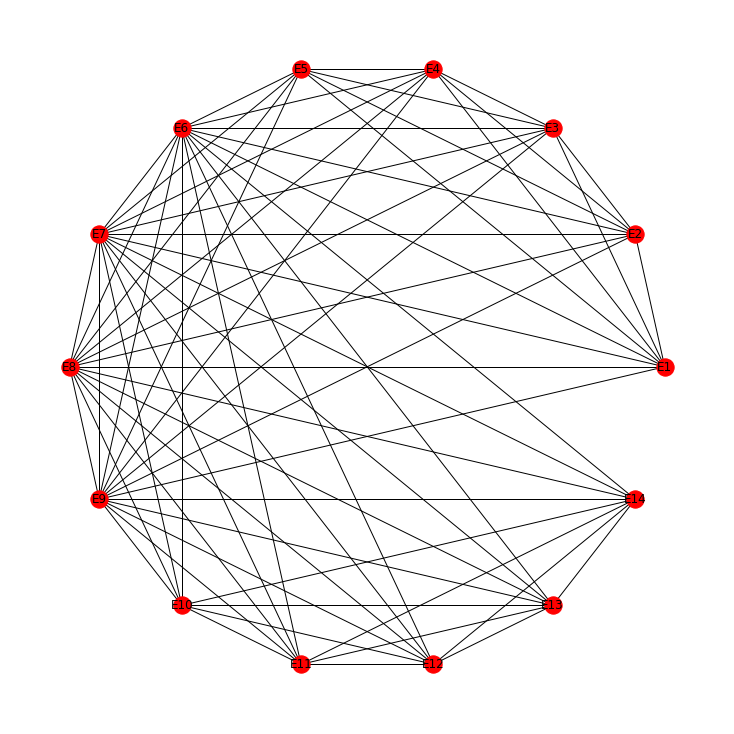

In [ ]:
plt.figure(figsize=(10,10))
nx.draw_circular(G, with_labels=True, node_color="red")

plt.figure(figsize=(10,10))
nx.draw_circular(W, with_labels=True, node_color="red")

# project bipartite graph onto women nodes
C = bipartite.projected_graph(G, clubs)
print()
print("#Common clubs, Club")
for w in clubs:
    print(f"{C.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
C = bipartite.weighted_projected_graph(G, clubs)
print()
print("#Club meetings, Clubs")
for w in clubs:
    print(f"{C.degree(w, weight='weight')} {w}")

plt.figure(figsize=(10,10))
nx.draw_circular(C, with_labels=True, node_color="red")

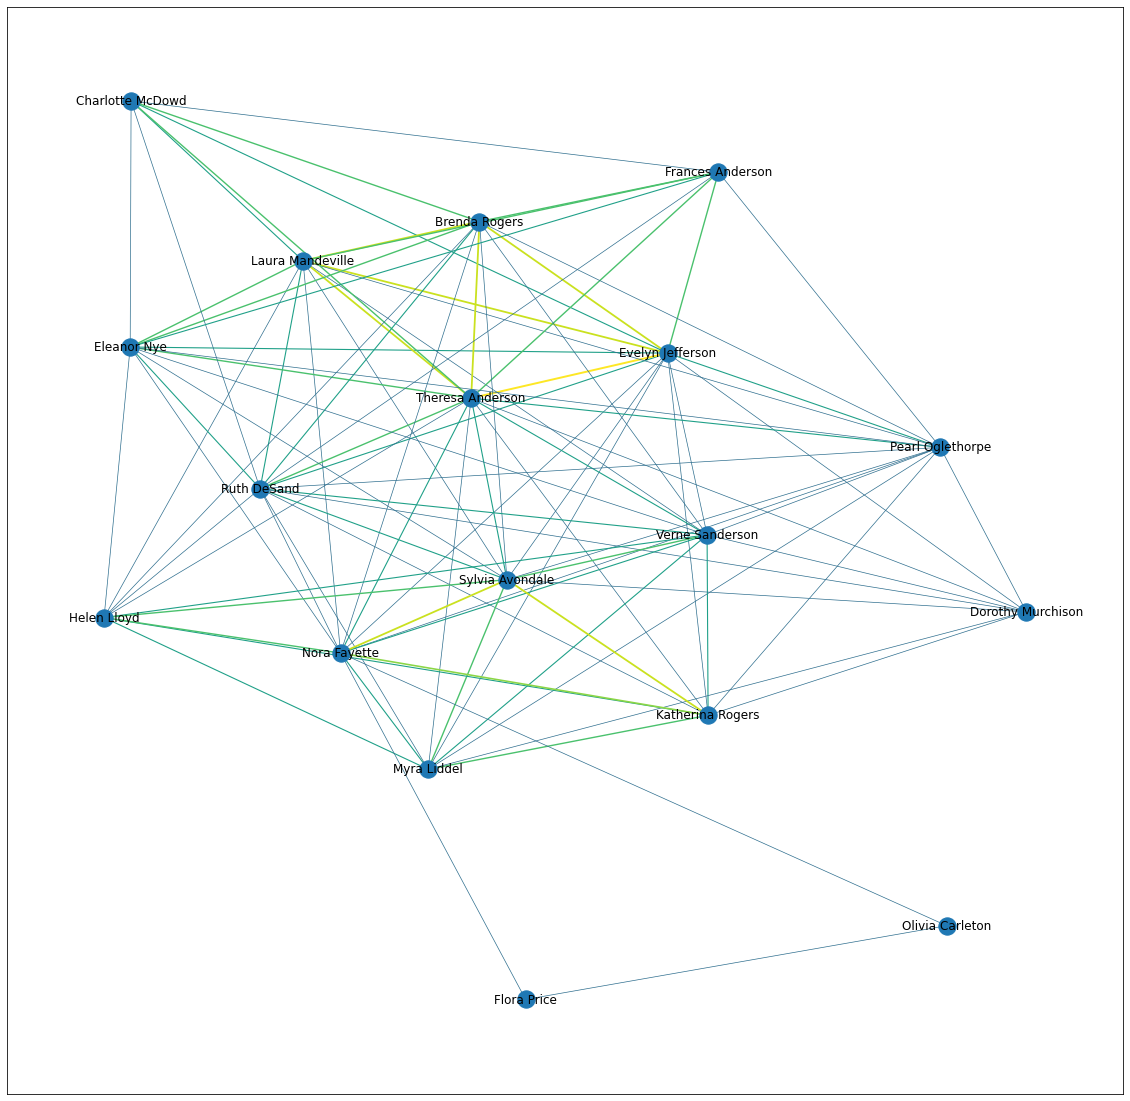

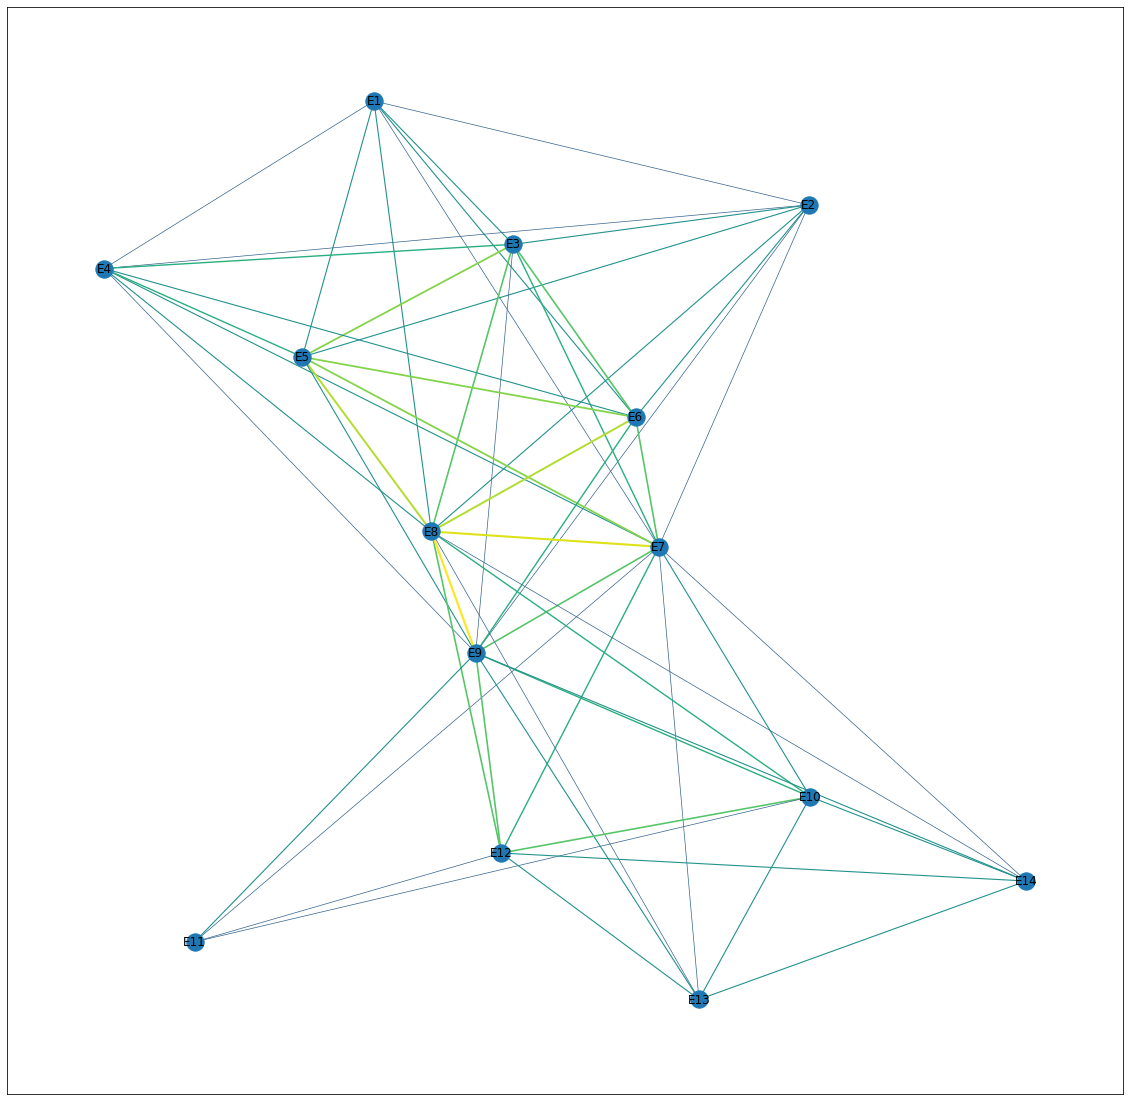

In [113]:
import math



plt.figure(figsize=(20,20))
womennet=bipartite.weighted_projected_graph(G, women, ratio=False)
weights=[math.log(edata['weight']) for f,t,edata in womennet.edges(data=True)]
nx.draw_networkx(womennet,width=weights, edge_color=weights)


plt.figure(figsize=(20,20))
clubnet=bipartite.weighted_projected_graph(G, clubs, ratio=False)
weights=[math.log(edata['weight']) for f,t,edata in clubnet.edges(data=True)]
nx.draw_networkx(clubnet,width=weights, edge_color=weights)

Traingles with Women listed as one of the Vertex

In [ ]:
nx.triangles(womennet)


{'Brenda Rogers': 101,
 'Charlotte McDowd': 55,
 'Dorothy Murchison': 112,
 'Eleanor Nye': 101,
 'Evelyn Jefferson': 122,
 'Flora Price': 66,
 'Frances Anderson': 101,
 'Helen Lloyd': 122,
 'Katherina Rogers': 112,
 'Laura Mandeville': 101,
 'Myra Liddel': 112,
 'Nora Fayette': 122,
 'Olivia Carleton': 66,
 'Pearl Oglethorpe': 112,
 'Ruth DeSand': 122,
 'Sylvia Avondale': 122,
 'Theresa Anderson': 122,
 'Verne Sanderson': 122}

Traingles with Club listed as one of the Vertex

In [ ]:
nx.triangles(clubnet)

{'E1': 28,
 'E10': 28,
 'E11': 28,
 'E12': 28,
 'E13': 28,
 'E14': 28,
 'E2': 28,
 'E3': 28,
 'E4': 28,
 'E5': 28,
 'E6': 53,
 'E7': 53,
 'E8': 53,
 'E9': 53}

In [110]:
import pandas as pd

degree = pd.DataFrame(nx.degree(womennet))
degree.rename(columns={ degree.columns[1]: "Degree" }, inplace = True)
degree_cent = pd.DataFrame([nx.degree_centrality(womennet)]).T
degree_cent.rename(columns={ degree_cent.columns[0]: "Degree Centrality" }, inplace = True)
between_cent = pd.DataFrame([nx.betweenness_centrality(womennet)]).T
between_cent.rename(columns={ between_cent.columns[0]: "Betweenness Centrality" }, inplace = True)
close_cent = pd.DataFrame([nx.closeness_centrality(womennet)]).T
close_cent.rename(columns={ close_cent.columns[0]: "Closeness Centrality" }, inplace = True)
eigen_cent = pd.DataFrame([nx.eigenvector_centrality_numpy(womennet)]).T
eigen_cent.rename(columns={ eigen_cent.columns[0]: "Eigenvector Centrality" }, inplace = True)

degree = degree.set_index(0)

women_analysis = pd.concat([degree,degree_cent,between_cent,close_cent,eigen_cent], axis = 1)

women_analysis

,Degree,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
Evelyn Jefferson,17,1.000000,0.010122,1.000000,0.253524
Laura Mandeville,15,0.882353,0.002674,0.894737,0.230973
Theresa Anderson,17,1.000000,0.010122,1.000000,0.253524
Brenda Rogers,15,0.882353,0.002674,0.894737,0.230973
Charlotte McDowd,11,0.647059,0.000000,0.739130,0.172527
Frances Anderson,15,0.882353,0.002674,0.894737,0.230973
Eleanor Nye,15,0.882353,0.002674,0.894737,0.230973
Pearl Oglethorpe,16,0.941176,0.005348,0.944444,0.243157
Ruth DeSand,17,1.000000,0.010122,1.000000,0.253524
Verne Sanderson,17,1.000000,0.010122,1.000000,0.253524


In [111]:
import pandas as pd

degree = pd.DataFrame(nx.degree(clubnet))
degree.rename(columns={ degree.columns[1]: "Degree" }, inplace = True)
degree_cent = pd.DataFrame([nx.degree_centrality(clubnet)]).T
degree_cent.rename(columns={ degree_cent.columns[0]: "Degree Centrality" }, inplace = True)
between_cent = pd.DataFrame([nx.betweenness_centrality(clubnet)]).T
between_cent.rename(columns={ between_cent.columns[0]: "Betweenness Centrality" }, inplace = True)
close_cent = pd.DataFrame([nx.closeness_centrality(clubnet)]).T
close_cent.rename(columns={ close_cent.columns[0]: "Closeness Centrality" }, inplace = True)
eigen_cent = pd.DataFrame([nx.eigenvector_centrality_numpy(clubnet)]).T
eigen_cent.rename(columns={ eigen_cent.columns[0]: "Eigenvector Centrality" }, inplace = True)

degree = degree.set_index(0)

club_analysis = pd.concat([degree,degree_cent,between_cent,close_cent,eigen_cent], axis = 1)

club_analysis


,Degree,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
E1,8,0.615385,0.000000,0.722222,0.232251
E2,8,0.615385,0.000000,0.722222,0.232251
E3,8,0.615385,0.000000,0.722222,0.232251
E4,8,0.615385,0.000000,0.722222,0.232251
E5,8,0.615385,0.000000,0.722222,0.232251
E6,13,1.000000,0.080128,1.000000,0.339336
E7,13,1.000000,0.080128,1.000000,0.339336
E8,13,1.000000,0.080128,1.000000,0.339336
E9,13,1.000000,0.080128,1.000000,0.339336
E10,8,0.615385,0.000000,0.722222,0.232251


**Discussion**

**Initial**

Looking at the initial data I would assume the women with the most number of meetings would be the most influential in centrality measures (Evelyn Jefferson 50 meetings and Theresa Anderson 57 meetings). Similarily clubs E6-E9 are important when examining the relaitonship between clubs.

**Triads**

We can see with a quick glance at the triads that most of the women are close to the same amount of triads except for Charlotte Mcdowd (55), Flora Price (66), and Olivia Carleton (66). These 3 women are likely outliers in their lack of participation when compared to the rest of the group.

For the clubs, the list of Triads identifies 4 clubs with 58 triads which is far and away more than the average of 28 for the rest of the clubs. This is consistent with our assessment above that clubs E6-E9 are the most influential and central.

**Weighted Projected Graphs**

We can see in the women's weighted projected graphs that there are 2 core groups that are in strong relationship with each other for club participation. One group is a group of 4 that is made of Evelyn Jefferson, Theresa Anderson, Laura Mandeville and Brenda Rodgers. The second group is a group of 3 made up of Norah Fayette, Sylvia Avondale, and Katherina Rodgers. The second groups connection seems to be a bit weaker then the first, but both groups would indicate that the women in them are likely close friends. We also see that Flora Price and Olivia Carleton only have connections with Norah Fayette and each other. This indicates to me that they may be outsiders amongst the population of these women and brought into the fold by Nora.

For the clubs once again we can determine that E6-E9 are the most popular cluster of clubs with a lot of their participation overlapping. Additionally, we see in the graph that E3 and E5 are likely the next most popular clubs as staellites to the E6-E9 cluster.

**Centrality Charts**

Evelyn Jefferson, Theresa Anderson, Ruth DeSand, Verne Sanderson, Sylvia Avondale, Nora Fayette and Helen Lloyd appear to be the most central women in this network. Avondale, Jeferson, and Anderson all make sense when looking at the plots where they are ring-leaders of the most closely knitted groups. While Sanderson and DeSand appear to be connectors between each closely knit group. Nora Fayette is the loan connector to 2 of our outliers while also a member of close knit group 2 and Helen Lloyd appears to have high centrality due to her connections with a large number of people and not gravitating to one group or another. And as expected Olivia Carlton and Flora Price are the least central.

For the clubs the ccentrality of clubs E6-E9 is reinforced as the most central clubs by a fair margin
